In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
import datetime as dt
%matplotlib inline

In [2]:
data=pd.read_csv("Data.V7.csv", index_col="Date")

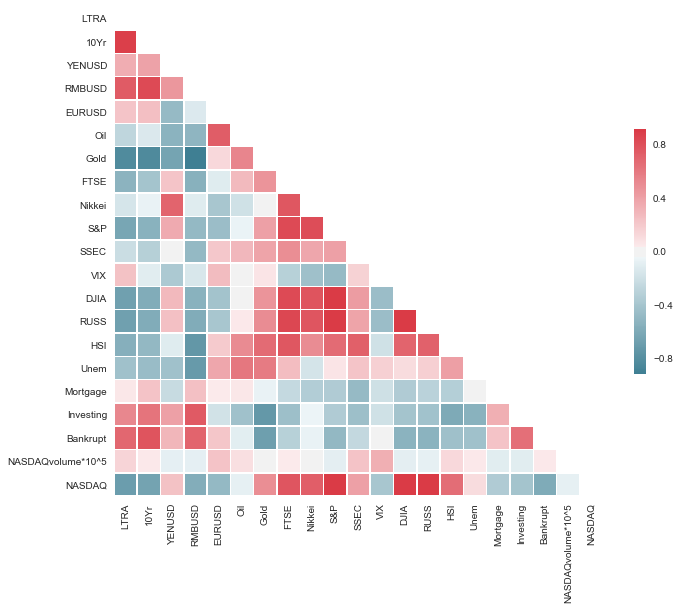

In [3]:
sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
Val1=['LTRA', '10Yr', "RMBUSD",'EURUSD']
Val2=['Unem','Mortgage', 'Investing', 'Bankrupt']
Val3=['YENUSD','Oil','VIX']
Val4=['S&P','Gold','RUSS','NASDAQ']
Val5=['DJIA', 'HSI','Nikkei','FTSE','SSEC',"NASDAQvolume*10^5"]

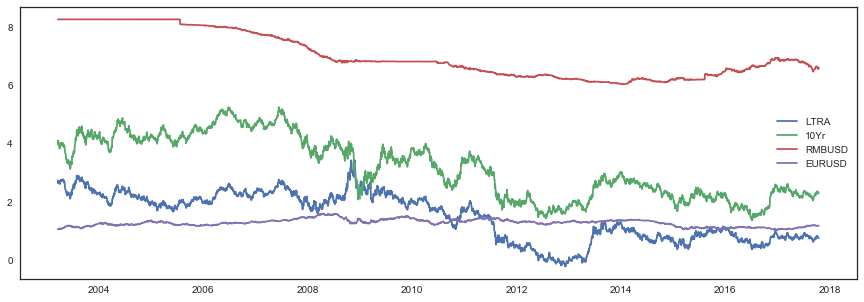

In [5]:
plt.figure(figsize=(15,5))
for i in Val1:
    plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index],data[i].values, label=i)
plt.legend(loc="best")

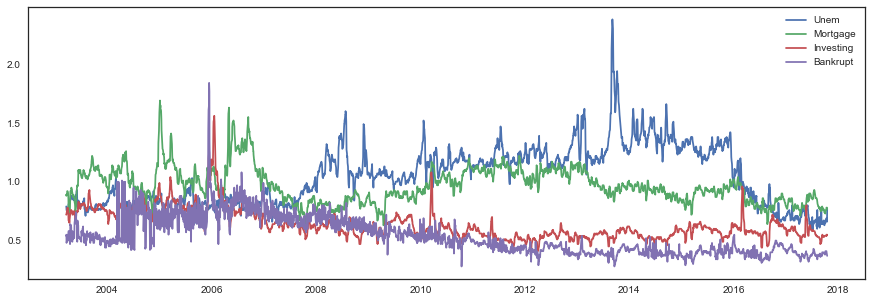

In [6]:
plt.figure(figsize=(15,5))
for i in Val2:
    plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index],data[i].values, label=i)
plt.legend(loc="best")

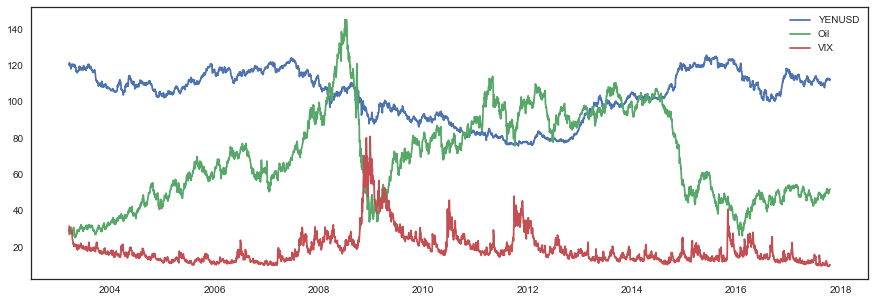

In [7]:
plt.figure(figsize=(15,5))
for i in Val3:
    plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index],data[i].values, label=i)
plt.legend(loc="best")

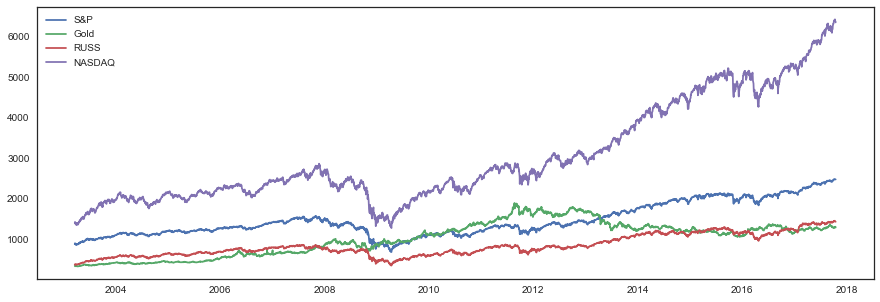

In [8]:
plt.figure(figsize=(15,5))
for i in Val4:
    plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index],data[i].values, label=i)
plt.legend(loc="best")

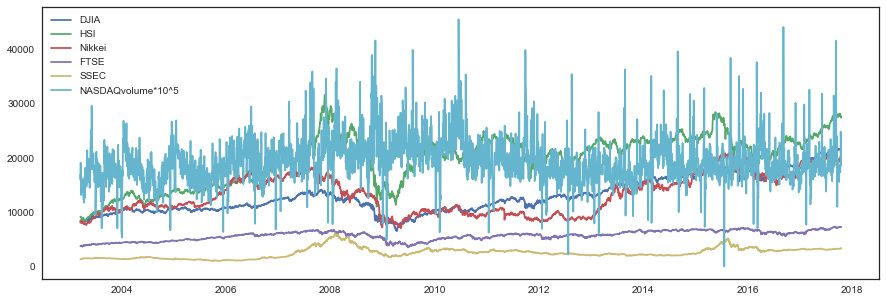

In [9]:
plt.figure(figsize=(15,5))
for i in Val5:
    plt.plot([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in data.index],data[i].values, label=i)
plt.legend(loc="best")

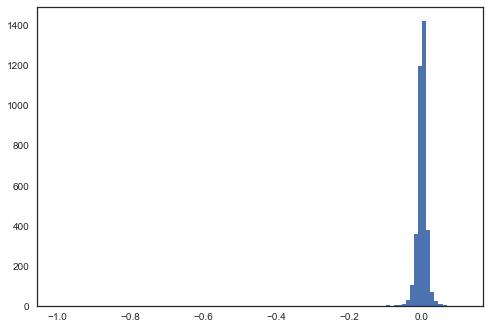

In [10]:
NASDAQLogreturn=[-1] #set the first value to -1 to align dataframe
temp=data["NASDAQ"].values
for i in range(1,len(temp)):
    NASDAQLogreturn.append(np.log(temp[i]/temp[i-1]))
data["NASDAQLogreturn"]=pd.Series(NASDAQLogreturn, index=data.index)
plt.hist(data["NASDAQLogreturn"], bins=100);

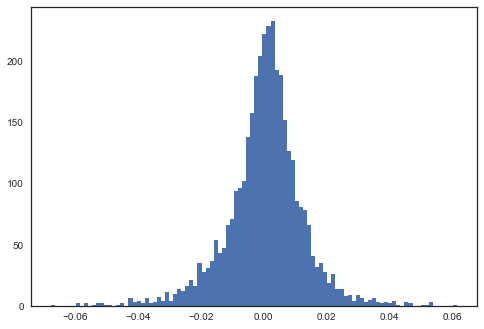

In [11]:
ReturnNoExtreme=sorted(data["NASDAQLogreturn"])[5:-5]
plt.hist(ReturnNoExtreme, bins=100);

In [12]:
# divide NASDAQ into up state(1) and down state(-1)
ret = data["NASDAQLogreturn"]
class_today = ret.copy()
class_today[ret >= 0] = 1
class_today[ret < 0] = -1

In [13]:
data["NASDAQ_class_today"] = class_today
data["NASDAQ_class_nextday"] = class_today.shift(-1)
data.dropna(inplace=True)

In [14]:
data["NASDAQ_class_nextday"].value_counts()

 1.0    1987
-1.0    1630
Name: NASDAQ_class_nextday, dtype: int64

#### Use linear logistic regression as a preliminary analysis on the data

In [27]:
from sklearn import linear_model

In [28]:
n_train = 3000
train_data = data.iloc[:n_train, :]
test_data = data.iloc[n_train:, :]

X_train = train_data.iloc[:, :-4]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-4]
y_test = test_data.iloc[:, -1]

In [29]:
# Use standardization to scale the input sample X in training set and use the same scaler to scale the testing set
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
logreg = linear_model.LogisticRegression(C=1e6)

In [31]:
logreg.fit(X_train_scaled,y_train)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [32]:
predict_class = logreg.predict(X_test_scaled)

In [33]:
accuracy = logreg.score(X_test_scaled, y_test)
print("prediction accuracy of linear logistic regression: ", accuracy)

prediction accuracy of linear logistic regression:  0.542949756888
